In [224]:
%matplotlib inline

## Regression

## Importing data for supervised learning

In this notebook, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

** Task assignment **

* Import numpy and pandas as their standard aliases (np and pd).
* Read the file './data/gapminder_tidy.csv' into a DataFrame df using the `read_csv()` function.
* Create array `X` for the 'fertility' feature and array y for the 'life' target variable.
* Reshape the arrays by using the `.reshape()` method and passing in -1 and 1.

In [225]:
# Import numpy and pandas
import numpy as np
import pandas as pd 
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gapminder_tidy.csv')
df = df.fillna(0)

df.sample(1)





,Country,Year,fertility,life,population,child_mortality,gdp,region
1207,Brunei,1971,5.771,67.632,131010.0,62.1,78230.0,East Asia & Pacific


In [226]:
# Create arrays for features and target variable
y = df['life'].to_numpy()
X = df['fertility'].to_numpy()

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (10111,)
Dimensions of X before reshaping: (10111,)
Dimensions of y after reshaping: (10111, 1)
Dimensions of X after reshaping: (10111, 1)


## Exploring the Gapminder data

As always, it is important to explore your data before building models. You can construct a heatmap showing the correlation between the different features of the Gapminder dataset as follows which has been pre-loaded into a DataFrame as df and is available for exploration in the Python Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as `.info()`, `.describe()`, `.head()`.

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:

### Correlation Matrix

<Axes: >

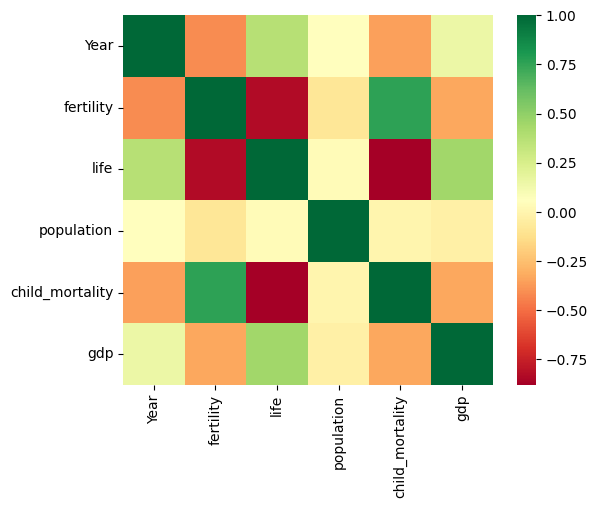

In [227]:
from IPython.display import Image
%matplotlib inline

import seaborn as sns

num_data=df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_data.corr(), square=True, cmap='RdYlGn')

1. Year and Life Expectancy: As years progress, life expectancy tends to increase.
2. Fertility and Infant Mortality: There is a strong positive relationship between fertility and infant mortality;        countries with higher fertility rates tend to have higher infant mortality rates.
3. Life Expectancy and GDP: Countries with higher GDP tend to have higher life expectancy.
4. Fertility and Life Expectancy: Higher fertility is associated with lower life expectancy.
5. Life Expectancy and Infant Mortality: Higher life expectancy is associated with lower infant mortality rates.

### Information 

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          10111 non-null  object 
 1   Year             10111 non-null  int64  
 2   fertility        10111 non-null  float64
 3   life             10111 non-null  float64
 4   population       10111 non-null  float64
 5   child_mortality  10111 non-null  float64
 6   gdp              10111 non-null  float64
 7   region           10111 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 632.1+ KB


### Describe

In [229]:
df.describe()


,Year,fertility,life,population,child_mortality,gdp
count,10111.000000,10111.000000,10111.000000,1.011100e+04,10111.000000,10111.000000
mean,1988.514588,4.024336,64.078600,2.559688e+07,73.631272,11346.281278
std,14.430849,2.017249,11.122779,1.032239e+08,79.038484,17258.222810
min,1964.000000,0.000000,6.000000,0.000000e+00,0.000000,0.000000
25%,1976.000000,2.171000,56.282500,8.831420e+05,14.100000,1538.000000
50%,1989.000000,3.630000,67.157000,4.764319e+06,40.200000,5048.000000
75%,2001.000000,5.903000,72.484000,1.476182e+07,112.550000,14026.000000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


### Head

In [230]:
df.head(3)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia


** Task assignment **

Once you have a feel for the data, consider the statements below and select the one that is not true.

* The DataFrame has 139 samples (or rows) and 9 columns.
* Life and fertility are negatively correlated.
* The mean of life is 64.0786.
* Fertility is of type float64.
* GDP and life are positively correlated

**Response:** The first statement is false because the dataset contains 10,111 items and 9 columns.

## Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$ score using scikit-learn's `.score()` method.

** Task assignment **

* Import `LinearRegression` from `sklearn.linear_model`.
* Create a `LinearRegression` regressor called `reg`.
* Set up the prediction space to range from the minimum to the maximum of `X`. This has been done for you.
* Fit the regressor to the data (`X` and `y`) and compute its predictions using the `.predict()` method and the prediction_space array.
* Compute and print the $R^2$ score using the `.score()` method.
* Overlay the plot with your linear regression line. 

Score R^2: 1.0


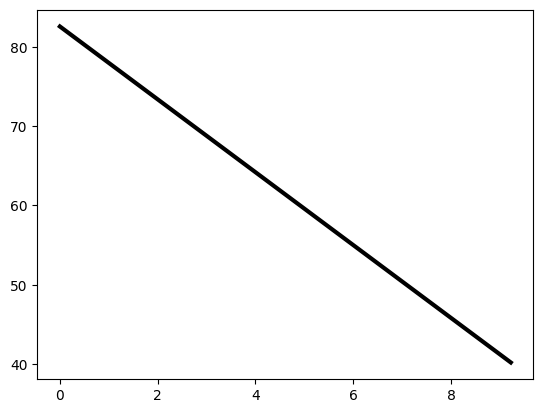

In [231]:
import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data

reg.fit(X,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('Score R^2:',reg.score(prediction_space, y_pred))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Train/test split for regression

As you learned earlier, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the $R^2$ score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array `X` and target variable array `y` have been pre-loaded for you from the DataFrame `df`.

** Task assignment **

* Import LinearRegression from `sklearn.linear_model`, `mean_squared_error` from `sklearn.metrics`, and `train_test_split` from `sklearn.model_selection`.
* Using `X` and `y`, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
* Compute and print the $R^2$ score using the `.score()` method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`.

In [232]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
r2 = reg_all.score(X_test,y_test)
print("R^2: {}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6846767325272605
Root Mean Squared Error: 6.177940351229785


## 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses $R^2$ as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as `df` and split into the feature/target variable arrays `X` and `y`. The modules `pandas` and `numpy` have been imported as `pd` and `np`, respectively.

** Task assignment **

* Import LinearRegression from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`.
* Create a linear regression regressor called `reg`.
* Use the `cross_val_score()` function to perform 5-fold cross-validation on `X` and `y`.
* Compute and print the average cross-validation score. You can use NumPy's `mean()` function to compute the average.

In [233]:
# Import the necessary modules

from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.74913801 0.76622761 0.57819208 0.67254414 0.62642119]
Average 5-Fold CV Score: 0.6785046065946473


## K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

You can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV by executing the following `cv=3` and `cv=10`:

`%timeit cross_val_score(reg, X, y, cv = ____)`

** Task Assignment **

* Import `LinearRegression` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`.
* Create a linear regression regressor called `reg`.
* Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [234]:

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit cvscores_3 = cross_val_score(reg,X,y,cv=3)
print('3 folds : ', np.mean(cvscores_3))

# Perform 10-fold CV
%timeit  cvscores_10 = cross_val_score(reg,X,y,cv=10)
print('10 folds : ', np.mean(cvscores_10))

# Now time the 3-fold and 10-fold CV and compare the results

3.51 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3 folds :  0.6732691716515659
11.3 ms ± 769 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 folds :  0.6677779376840294


**Response:** When applying the %timeit command, it is observed that indeed, with more bags, the error precision increases; however, the computation time also increases proportionally.

## Melbourne housing dataset - Kaggle

We will now switch to a dataset available on Kaggle: the Melbourne housing dataset. Just like above, start by loading the dataset using the pandas read_csv function. The dataset is available in "data/melb_data.csv". We will try to predict the sales price based on a set of input variables. 

** Task Assignment **
* Print the list of columns in the dataset to find the name of the prediction target.
* Save this to a new variable "y". 

In [235]:
df = pd.read_csv('data/melb_data.csv')

df.head(3)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [236]:
# Create prediction target y

display(df.columns)




Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [237]:
y=df['Price']

y.head(3)

0    1480000.0
1    1035000.0
2    1465000.0
Name: Price, dtype: float64

** Task assignment **
* Now create a dataframe X holding the predictive features. Use the following set of columns:
** LotArea
** YearBuilt
** 1stFlrSF
** 2ndFlrSF
** FullBath
** BedroomAbvGr
** TotRmsAbvGrd

Do this by first creating a list of features, and then using that list to create the dataframe that you'll use to fit the model. 

In [238]:
from sklearn.impute import SimpleImputer

# Create the list of features below
feature_names = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']



# Available  data assignation 

X=df[feature_names]




In [239]:
imputer=SimpleImputer()
Xf=pd.DataFrame(imputer.fit_transform (X))

Xf.columns=feature_names

In [240]:
Xf.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,18396.000000,18396.000000,18396.000000,18396.000000,18396.000000
mean,2.935040,1.538492,558.116371,-37.809849,144.996338
std,0.958202,0.620880,3428.730081,0.073436,0.096260
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,250.750000,-37.845400,144.950952
50%,3.000000,1.538492,558.116371,-37.809849,144.996338
75%,3.000000,2.000000,596.000000,-37.767400,145.046900
max,12.000000,8.000000,433014.000000,-37.408530,145.526350


Now first take a look at your data before we start building a model for it. 

** Task assignment **

* Import LinearRegression from `sklearn.linear_model`, `mean_squared_error` from `sklearn.metrics`, and `train_test_split` from `sklearn.model_selection`.
* Using `X` and `y`, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
* Compute and print the $R^2$ score using the `.score()` method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`.

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
    Xf, y, test_size=0.3, random_state=42)

reg_all=LinearRegression()

reg_all.fit(X_train,y_train) # fitting the model 

LinearRegression()

In [242]:
print('Score: ',reg_all.score(X_test,y_test)) 

Score:  0.3251786693277382


In [243]:
y_pred=reg_all.predict(X_test) # obtain prediction target

In [244]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 524985.0127679748


**Conclussion :** A linear regression can not adjust a multi feature model.

Now let's compare that with a Decision Tree regressor model. 

** Task assignment **
* Import DecisionTreeRegressor from sklearn.tree.
* Create a new DecisionTreeRegressor model.
* Fit the model to your X_train, y_train data.
* Evaluate the performance (R^2 and RMSE) on the test set.

In [245]:
from sklearn.tree import DecisionTreeRegressor

DT_model=DecisionTreeRegressor()

DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [246]:
DT_model.score(X_test,y_test)

0.5178261825218522

In [247]:
y_pred=DT_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 443766.29796234734


In [248]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_std=scaler.fit_transform(Xf)

y_std=y.to_numpy()

In [249]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_std, y_std, test_size=0.3, random_state=42)

reg_all=LinearRegression()

reg_all.fit(X_train_s,y_train_s) # fitting the model 

LinearRegression()

In [250]:
print('Score: ',reg_all.score(X_test_s,y_test_s)) 

Score:  0.32517866932773754


In [251]:
DT_model=DecisionTreeRegressor()

DT_model.fit(X_train_s,y_train_s)

DecisionTreeRegressor()

In [252]:
DT_model.score(X_test_s,y_test_s)

0.5145325572593706

In [253]:
y_pred_s=DT_model.predict(X_test_s)

rmse = np.sqrt(mean_squared_error(y_test_s,y_pred_s))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 445279.3544130204


**Conclussion:** Despite the standardization, good results are not achieved with either model. It is possible that a thorough feature analysis and the use of selection algorithms are needed.